In [2]:
### Initial Edit of BigFoot Data

In [3]:
import pandas as pd
import sqlite3

# Files for Bigfoot Data
input_file = r"C:\Users\sarah\OneDrive\Desktop\BigFootAlcoholProject\BigfootData.csv"
edited_file = r"C:\Users\sarah\OneDrive\Desktop\BigFootAlcoholProject\EditedBigFootData.csv"
db_file = r"C:\Users\sarah\OneDrive\Desktop\BigFootAlcoholProject\BigfootDatabase.db"

# Load CSV into DataFrame
df = pd.read_csv(input_file)

# Convert Year column to numeric 
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Remove specified columns to only leave state, county year and report
columns_to_remove = [
    'Report Type', 'Id', 'Class', 'Submitted Date', 'Headline', 'Season', 'Month',
    'Location Details', 'Nearest Town', 'Nearest Road', 'Also Noticed',
    'Other Witnesses', 'Other Stories', 'Time And Conditions', 'Environment',
    'Follow-Up', 'Follow-Up Report', 'Date', 'Author', 'Media Source', 'Source Url',
    'Media Issue', 'Observed.1', 'A & G References'
]

df = df.drop(columns=columns_to_remove, errors='ignore')

# Filter for  where year is between 2002 and 2012
df = df[(df['Year'] >= 2002) & (df['Year'] <= 2012)]
df = df.dropna(subset=['Year'])

# Column names and first5 rows
print("Column Names:", df.columns.tolist())
print("\nFirst 5 Rows:\n", df.head())

df.to_csv(edited_file, index=False)
print(f"\nEdited dataset saved to: {edited_file}")

print(f"\nFiltered database updated: {db_file}")


Column Names: ['Year', 'State', 'County', 'Observed']

First 5 Rows:
       Year   State           County  \
0   2004.0  Alaska        Anchorage   
1   2003.0  Alaska        Anchorage   
4   2004.0  Alaska      Bristol Bay   
6   2009.0  Alaska        Fairbanks   
14  2004.0  Alaska  Prince of Wales   

                                             Observed  
0   I and two of my friends were bored one night s...  
1   Me and a couple of friends had been bored, whe...  
4   To whom it may concern, I am a commercial fish...  
6   It was the month of July, 2009 in Fairbanks Al...  
14  This incident happened last night just after 1...  

Edited dataset saved to: C:\Users\sarah\OneDrive\Desktop\BigFootAlcoholProject\EditedBigFootData.csv

Filtered database updated: C:\Users\sarah\OneDrive\Desktop\BigFootAlcoholProject\BigfootDatabase.db


In [ ]:
### Initial Edit Alcohol Data

In [4]:
 import pandas as pd
import sqlite3

# Files for Alcohol Consumption
input_File = r"C:\Users\sarah\OneDrive\Desktop\BigFootAlcoholProject\AlcoholData.csv"
db_path = r"C:\Users\sarah\OneDrive\Desktop\BigFootAlcoholProject\UpdatedAlcohol.db"
csv_output = r"C:\Users\sarah\OneDrive\Desktop\BigFootAlcoholProject\UpdatedAlcohol.csv"

# Load Excel file
df = pd.read_csv(input_File)

# Display first 5 rows of the original data
print("Original Data Preview:")
print(df.head())

# Define columns to drop
columns_to_drop = [
    '2002 Females', '2002 Males', '2003 Females', '2003 Males', '2004 Females', '2004 Males',
    '2005 Females', '2005 Males', '2006 Females', '2006 Males', '2007 Females', '2007 Males',
    '2008 Females', '2008 Males', '2009 Females', '2009 Males', '2010 Females', '2010 Males',
    '2011 Females', '2011 Males', '2012 Females', '2012 Males', 
    'Percent Change 2002-2012, Females', 'Percent Change 2002-2012, Males',
    'Percent Change 2005-2012, Females', 'Percent Change 2005-2012, Males'
]

# Drop specified columns
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Display first 5 rows of cleaned data
print("\nCleaned Data Preview:")
print(df_cleaned.head())

# Rename Location to County
df.rename(columns={'Location': 'County'}, inplace=True)

# Columns to melt (all the year columns)
year_columns = [col for col in df.columns if 'Both Sexes' in col and 'Percent Change' not in col]

# Melt the DataFrame (I HATE MELT!!!)
df_long = df.melt(id_vars=['State', 'County'], 
                  value_vars=year_columns, 
                  var_name='Year', 
                  value_name='Consumption')

# Extract the numeric year from the Year column-I HAD TO GOOGLE THIS REPEATEDLY!!!!!!!! I received this script sugggestion for a DB admin at work thank you @QP
df_long['Year'] = df_long['Year'].str.extract(r'(\d{4})').astype(int)

# Sort by Year
df_long = df_long.sort_values(by=['Year', 'State', 'County'])

# Connect to SQL database
conn = sqlite3.connect(db_path)

# Write cleaned DataFrame to SQL table
table_name = "cleaned_alcohol_use"
df_cleaned.to_sql(table_name, conn, if_exists="replace", index=False)

# Confirm changes
cursor = conn.cursor()
cursor.execute(f"PRAGMA table_info({table_name})")
columns = [col[1] for col in cursor.fetchall()]
print("\nRemaining column names:", columns)

# Save the cleaned data to a CSV file
df_cleaned.to_csv(csv_output, index=False)
print(f"\nCleaned dataset saved to: {csv_output}")
conn.close()

Original Data Preview:
      State        Location  2002 Both Sexes  2002 Females  2002 Males  \
0  National   United States             55.4          47.5        63.7   
1   Alabama         Alabama             40.7          32.1        49.6   
2   Alabama  Autauga County             39.4          29.4        49.7   
3   Alabama  Baldwin County             54.0          45.7        62.5   
4   Alabama  Barbour County             36.0          27.3        45.0   

   2003 Both Sexes  2003 Females  2003 Males  2004 Both Sexes  2004 Females  \
0             56.6          48.9        64.6             55.2          47.6   
1             42.3          33.8        51.2             41.0          32.9   
2             40.6          31.0        50.6             39.2          30.1   
3             54.9          47.0        63.2             53.1          45.2   
4             37.9          29.2        46.9             35.8          27.4   

   ...  2011 Males  2012 Both Sexes  2012 Females  2012 M

In [20]:
import pandas as pd

# Load datasets
dataset1 = pd.read_csv(r'C:\Users\sarah\OneDrive\Desktop\BigFootAlcoholProject\UpdatedAlcohol.csv')
dataset2 = pd.read_csv(r'C:\Users\sarah\OneDrive\Desktop\BigFootAlcoholProject\EditedBigFootData.csv')

# Melt first dataset (AlcoholData.csv)
dataset1_melted = pd.melt(dataset1, 
                          id_vars=['State', 'Location'],  # Ensure these columns exist in dataset1
                          value_vars=[col for col in dataset1.columns if 'Both Sexes' in col],  # Include all the 'Both Sexes' year columns
                          var_name='Year', 
                          value_name='Observed')

# Clean up Year column to match format
dataset1_melted['Year'] = dataset1_melted['Year'].str.replace(' Both Sexes', '')


# Rename Location to County
dataset1_melted.rename(columns={'Location': 'County'}, inplace=True)

# Output the transformed dataset1 (AlcoholData.csv) to a new file
dataset1_melted.to_csv(r'C:\Users\sarah\OneDrive\Desktop\BigFootAlcoholProject\AlcoholData_melted.csv', index=False)

# Output the dataset2 (BigfootData.csv) to a new file
dataset2.to_csv(r'C:\Users\sarah\OneDrive\Desktop\BigFootAlcoholProject\BigfootData_melted.csv', index=False)

# Preview  
print("Transformed AlcoholData:")
print(dataset1_melted.head())

print("\nBigfootData (Already in correct format):")
print(dataset2.head())


Transformed AlcoholData:
      State          County  Year  Observed
0  National   United States  2002      55.4
1   Alabama         Alabama  2002      40.7
2   Alabama  Autauga County  2002      39.4
3   Alabama  Baldwin County  2002      54.0
4   Alabama  Barbour County  2002      36.0

BigfootData (Already in correct format):
     Year   State           County  \
0  2004.0  Alaska        Anchorage   
1  2003.0  Alaska        Anchorage   
2  2004.0  Alaska      Bristol Bay   
3  2009.0  Alaska        Fairbanks   
4  2004.0  Alaska  Prince of Wales   

                                            Observed  
0  I and two of my friends were bored one night s...  
1  Me and a couple of friends had been bored, whe...  
2  To whom it may concern, I am a commercial fish...  
3  It was the month of July, 2009 in Fairbanks Al...  
4  This incident happened last night just after 1...  


In [50]:
import pandas as pd

# Load the melted alcohol consumption dataset
df = pd.read_csv("AlcoholData_melted.csv")

# Clean and standardize column names
df.columns = df.columns.str.strip().str.lower()

# Print out column names
print("Columns in dataset:", df.columns.tolist())

# Ensure year is still numeric 
df['year'] = pd.to_numeric(df['year'], errors='coerce')

#Confirm data
df.dropna(subset=['year', 'state', 'observed'], inplace=True)

# Standardize state names
df['state'] = df['state'].str.upper()

# Calculate the average alcohol consumption per state for each year 
avg_consumption = df.groupby(['year', 'state'])['observed'].mean().reset_index()

# Rename the column for clarity
avg_consumption.rename(columns={'observed': 'avg_alcohol_consumption'}, inplace=True)

# Display the results
print("Average Alcohol Consumption per State Each Year:")
print(avg_consumption)

#On to BigFoot
bigfoot_df = pd.read_csv("BigfootData_melted.csv")

# Clean and standardize column names
bigfoot_df.columns = bigfoot_df.columns.str.strip().str.lower()

# Convert year to number form
bigfoot_df['year'] = pd.to_numeric(bigfoot_df['year'], errors='coerce')

# Drop rows where year or state is missing
bigfoot_df.dropna(subset=['year', 'state'], inplace=True)

# Standardize state names 
bigfoot_df['state'] = bigfoot_df['state'].str.upper()

# Aggregate Bigfoot sightings by counting the number of records per year and state
bigfoot_summary = bigfoot_df.groupby(['year', 'state']).size().reset_index(name='bigfoot_sightings')

# Merge the Datasets

# Merge on year and state using an inner join
merged_df = pd.merge(avg_consumption, bigfoot_summary, on=['year', 'state'], how='inner')




# Calculate and Display Correlation

# Compute the  correlation between average alcohol consumption and Bigfoot sightings
correlation = merged_df['avg_alcohol_consumption'].corr(merged_df['bigfoot_sightings'])
print("\nCorrelation between Average Alcohol Consumption and Bigfoot Sightings:")
print(correlation)
# Save the dataset
merged_df.to_csv("Merged_Alcohol_Bigfoot_Correlation_Per_Year.csv", index=False)

print("\nDataset with correlation saved as 'Merged_Alcohol_Bigfoot_Correlation_Per_Year.csv'")

# -------------------------------
# Calculate Correlation Per State
# -------------------------------
def calculate_correlation(group):
    if len(group) > 1:  # Ensure at least 2 data points for correlation
        return group[['avg_alcohol_consumption', 'bigfoot_sightings']].corr().iloc[0, 1]
    else:
        return None  # Not enough data to compute correlation

# Apply correlation calculation per state
state_correlation = (
    merged_df.groupby('state')[['avg_alcohol_consumption', 'bigfoot_sightings']]
    .apply(lambda group: calculate_correlation(group))
    .reset_index()
)

# Rename correlation column
state_correlation.rename(columns={0: 'correlation'}, inplace=True)

# Merge the correlation values back into the main dataset
merged_df = merged_df.merge(state_correlation, on='state', how='left')

# -------------------------------
# Display Results
# -------------------------------
print("\nMerged Dataset with Correlation per State:")
print(merged_df.head())

# Save the updated dataset
merged_df.to_csv("Merged_Alcohol_Bigfoot_Correlation_with_Correlation.csv", index=False)

print("\nDataset with state correlation saved as 'Merged_Alcohol_Bigfoot_Correlation_with_Correlation.csv'")



Columns in dataset: ['state', 'county', 'year', 'observed']
Average Alcohol Consumption per State Each Year:
       year          state  avg_alcohol_consumption
0    2002.0        ALABAMA                35.275000
1    2002.0         ALASKA                51.845833
2    2002.0        ARIZONA                53.575000
3    2002.0       ARKANSAS                37.343421
4    2002.0     CALIFORNIA                58.464407
..      ...            ...                      ...
567  2012.0       VIRGINIA                48.079231
568  2012.0     WASHINGTON                59.522500
569  2012.0  WEST VIRGINIA                33.214286
570  2012.0      WISCONSIN                66.128767
571  2012.0        WYOMING                57.729167

[572 rows x 3 columns]

Correlation between Average Alcohol Consumption and Bigfoot Sightings:
0.0644097646421938

Dataset with correlation saved as 'Merged_Alcohol_Bigfoot_Correlation_Per_Year.csv'

Merged Dataset with Correlation per State:
     year       state  

In [41]:
import pandas as pd
from scipy.stats import pearsonr

# Load merged dataset
merged_df = pd.read_csv("Merged_Alcohol_Bigfoot_Correlation_Per_Year.csv")

# Drop NaN values (required for correlation test)
merged_df = merged_df.dropna(subset=['avg_alcohol_consumption', 'bigfoot_sightings'])

# Calculate Pearson correlation and p-value
correlation, p_value = pearsonr(merged_df['avg_alcohol_consumption'], merged_df['bigfoot_sightings'])

# Display results
print(f"Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is NOT statistically significant.")


Correlation Coefficient: 0.06440976464219382
P-Value: 0.21090463639065118
The correlation is NOT statistically significant.


In [47]:
import pandas as pd
from scipy.stats import pearsonr

# -------------------------------
# Load the Merged Dataset
# -------------------------------
df = pd.read_csv("Merged_Alcohol_Bigfoot_Correlation_Per_Year.csv")

# Drop NaN values in necessary columns
df = df.dropna(subset=['avg_alcohol_consumption', 'bigfoot_sightings'])

# -------------------------------
# Function to Calculate Correlation and P-Value
# -------------------------------
def calculate_correlation(group):
    if len(group) > 1 and group['bigfoot_sightings'].nunique() > 1 and group['avg_alcohol_consumption'].nunique() > 1:
        corr, p_value = pearsonr(group['avg_alcohol_consumption'], group['bigfoot_sightings'])
        return pd.Series({'correlation': corr, 'p_value': p_value})
    else:
        return pd.Series({'correlation': None, 'p_value': None})  # Not enough data or constant values

# -------------------------------
# Apply Correlation Calculation Per State
# -------------------------------
state_correlation = (
    df.groupby('state')[['avg_alcohol_consumption', 'bigfoot_sightings']]
    .apply(calculate_correlation, include_groups=False)
    .reset_index()
)

# Merge the correlation results into the main dataset
df = df.merge(state_correlation, on='state', how='left')

# -------------------------------
# Save the Updated Dataset
# -------------------------------
df.to_csv("Merged_Alcohol_Bigfoot_Correlation_with_PValue_Fixed.csv", index=False)

# -------------------------------
# Display Results
# -------------------------------
print("\nMerged Dataset with Correlation and P-Value per State:")
print(df.head())

print("\nDataset with correlation and p-value saved as 'Merged_Alcohol_Bigfoot_Correlation_with_PValue_Fixed.csv'")



Merged Dataset with Correlation and P-Value per State:
     year       state  avg_alcohol_consumption  bigfoot_sightings  \
0  2002.0     ALABAMA                35.275000                  2   
1  2002.0    ARKANSAS                37.343421                  4   
2  2002.0  CALIFORNIA                58.464407                 15   
3  2002.0    COLORADO                62.665574                  5   
4  2002.0     FLORIDA                50.808824                  2   

   correlation   p_value  
0     0.228991  0.498218  
1    -0.501157  0.116325  
2     0.532911  0.091428  
3    -0.265728  0.458055  
4     0.383492  0.244320  

Dataset with correlation and p-value saved as 'Merged_Alcohol_Bigfoot_Correlation_with_PValue_Fixed.csv'


In [54]:
import pandas as pd
from scipy.stats import pearsonr

# -------------------------------
# Load the Merged Dataset
# -------------------------------
df = pd.read_csv("Merged_Alcohol_Bigfoot_Correlation_Per_Year.csv")

# Drop NaN values
df = df.dropna(subset=['avg_alcohol_consumption', 'bigfoot_sightings'])

# Calculate Correlation, P-Value, and Significance (I googled this script)

def calculate_correlation(group):
    if len(group) > 1 and group['bigfoot_sightings'].nunique() > 1 and group['avg_alcohol_consumption'].nunique() > 1:
        corr, p_value = pearsonr(group['avg_alcohol_consumption'], group['bigfoot_sightings'])
        significant = p_value < 0.05  # True if p-value < 0.05, else False
        return pd.Series({'correlation': corr, 'p_value': p_value, 'significant': significant})
    else:
        return pd.Series({'correlation': None, 'p_value': None, 'significant': None})  # Not enough data or constant values


# Correlation Calculation Per State (Thank you QP for hleping with this script)

state_correlation = (
    df.groupby('state')[['avg_alcohol_consumption', 'bigfoot_sightings']]
    .apply(calculate_correlation, include_groups=False)
    .reset_index()
)

# Merge the  results
df = df.merge(state_correlation, on='state', how='left')

# Save the Updated Dataset

df.to_csv("Merged_Alcohol_Bigfoot_Correlation_with_Significance.csv", index=False)

print("\nMerged Dataset with Correlation, P-Value, and Significance per State:")
print(df.head())

print("\nDataset with significance column saved as 'Merged_Alcohol_Bigfoot_Correlation_with_Significance.csv'")



Merged Dataset with Correlation, P-Value, and Significance per State:
     year       state  avg_alcohol_consumption  bigfoot_sightings  \
0  2002.0     ALABAMA                35.275000                  2   
1  2002.0    ARKANSAS                37.343421                  4   
2  2002.0  CALIFORNIA                58.464407                 15   
3  2002.0    COLORADO                62.665574                  5   
4  2002.0     FLORIDA                50.808824                  2   

   correlation   p_value significant  
0     0.228991  0.498218       False  
1    -0.501157  0.116325       False  
2     0.532911  0.091428       False  
3    -0.265728  0.458055       False  
4     0.383492  0.244320       False  

Dataset with significance column saved as 'Merged_Alcohol_Bigfoot_Correlation_with_Significance.csv'


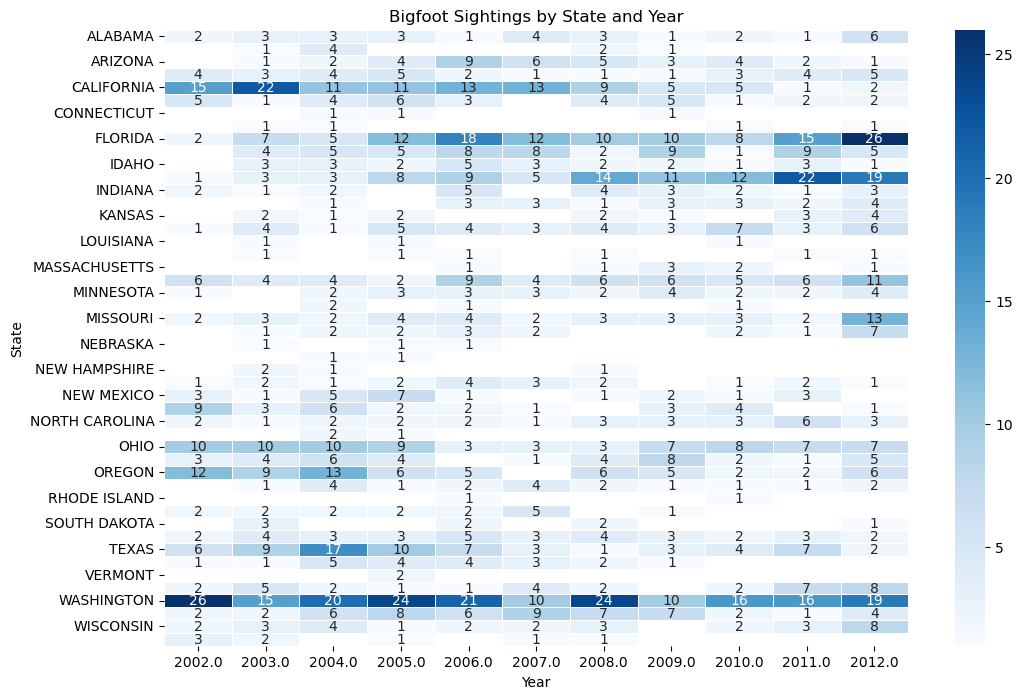

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv("Merged_Alcohol_Bigfoot_Correlation_with_Significance.csv")

# hjhheatmap visualization
pivot_table = df.pivot(index='state', columns='year', values='bigfoot_sightings')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt="g", linewidths=0.5)

# Labels and title
plt.xlabel('Year')
plt.ylabel('State')
plt.title('Bigfoot Sightings by State and Year')

# Show plot
plt.show()

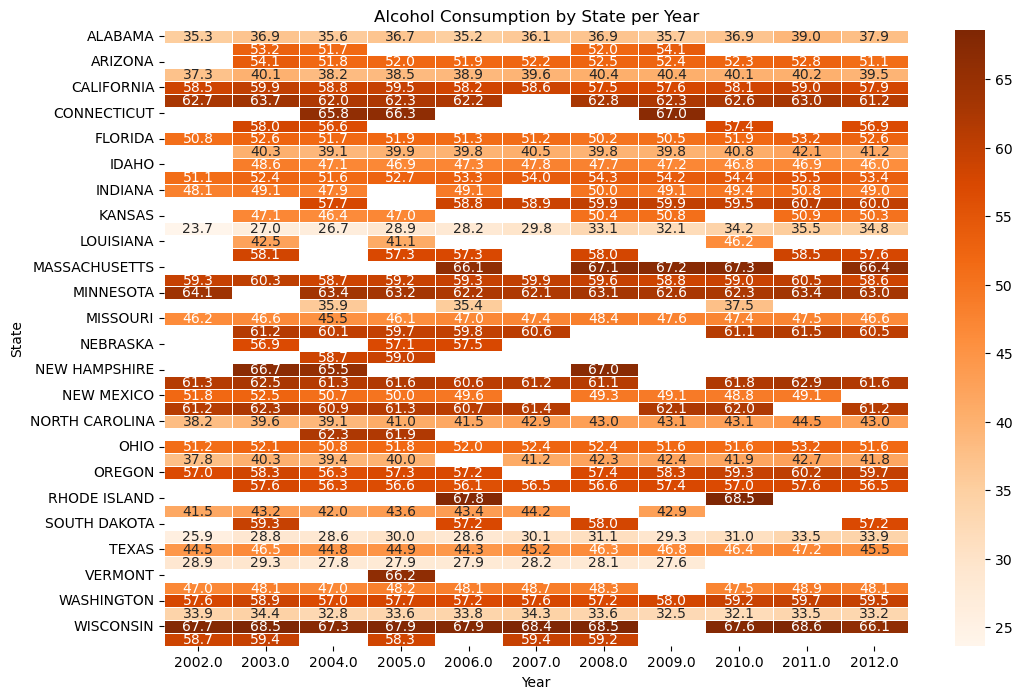

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Merged_Alcohol_Bigfoot_Correlation_with_Significance.csv")

# Pivot the data for heatmap visualization of alcohol consumption by state per year
pivot_table = df.pivot(index='state', columns='year', values='avg_alcohol_consumption')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="Oranges", annot=True, fmt=".1f", linewidths=0.5)

# Labels and title
plt.xlabel('Year')
plt.ylabel('State')
plt.title('Alcohol Consumption by State per Year')

# Show plot
plt.show()


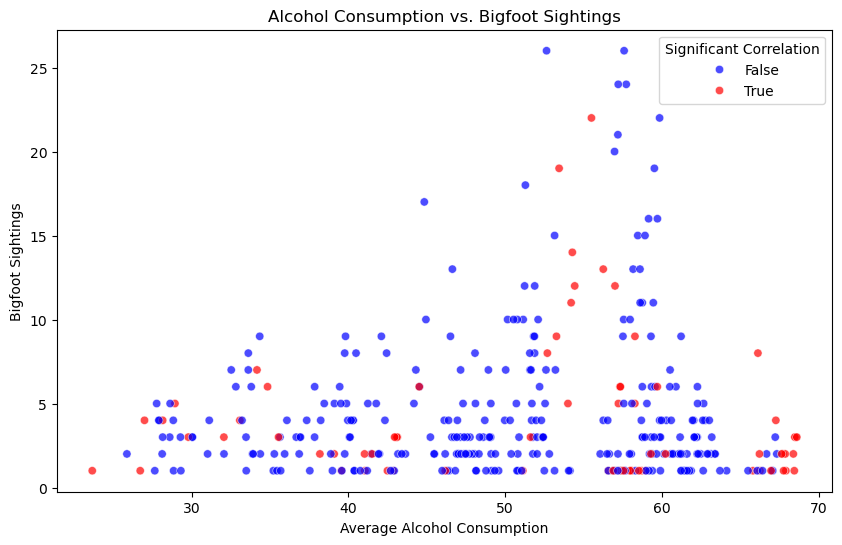

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Merged_Alcohol_Bigfoot_Correlation_with_Significance.csv")

# Convert significance column to boolean
df['significant'] = df['significant'].astype(bool)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['avg_alcohol_consumption'],
    y=df['bigfoot_sightings'],
    hue=df['significant'],
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)

# Labels and title
plt.xlabel('Average Alcohol Consumption')
plt.ylabel('Bigfoot Sightings')
plt.title('Alcohol Consumption vs. Bigfoot Sightings')
plt.legend(title='Significant Correlation')


plt.show()


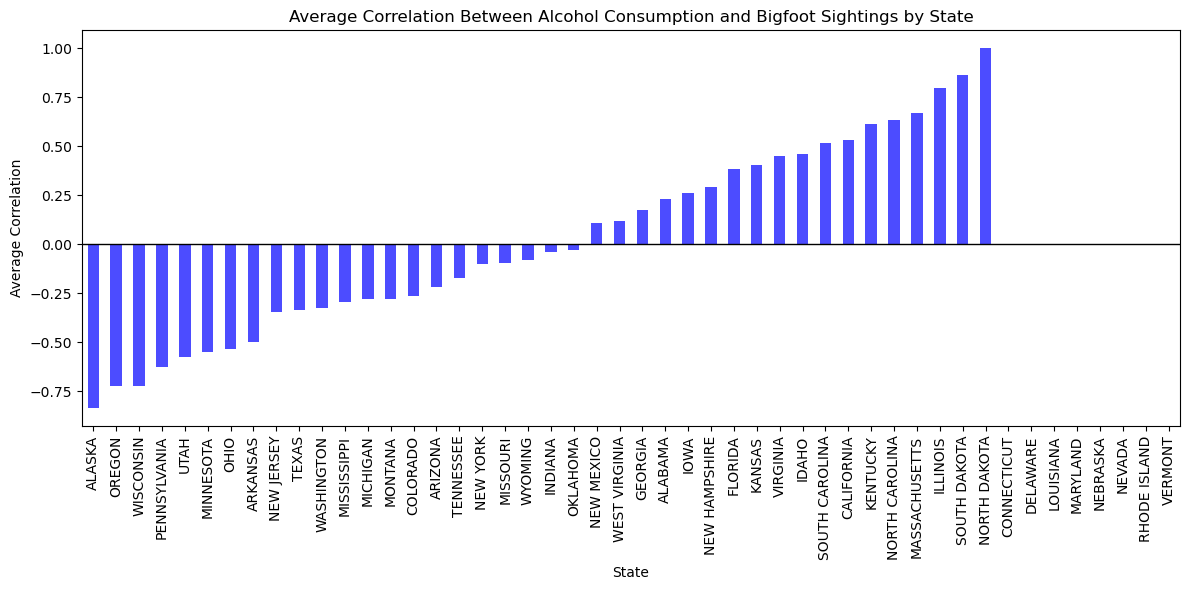

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Merged_Alcohol_Bigfoot_Correlation_with_Significance.csv")

# Compute the average correlation for each state
state_avg_correlation = df.groupby("state")["correlation"].mean().sort_values()

# Plot the results
plt.figure(figsize=(12, 6))
state_avg_correlation.plot(kind='bar', color='blue', alpha=0.7)
plt.axhline(0, color='black', linewidth=1)  # Add a horizontal line at 0
plt.title("Average Correlation Between Alcohol Consumption and Bigfoot Sightings by State")
plt.xlabel("State")
plt.ylabel("Average Correlation")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()